This is a file for managing tests and small snippets of code for the data analysis pipeline.

Keep the .gz files. Unzip them by running the scripts. 

When working with data in this notebook, do not destructively modify the files in order to preserve data integrity and reproducibility.


Export working processes to scripts for replication.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diagnoses_df = pd.read_csv('Data/diagnoses_icd.csv')

Verification - Total diagnoses (6364488) / Unique patients (223291) = 28.50


In [ ]:
# Verification
total_diagnoses = len(diagnoses_df)
unique_patients = diagnoses_df['subject_id'].nunique()
verification = total_diagnoses / unique_patients
print(f"Verification - Total diagnoses ({total_diagnoses}) / Unique patients ({unique_patients}) = {verification:.2f}")

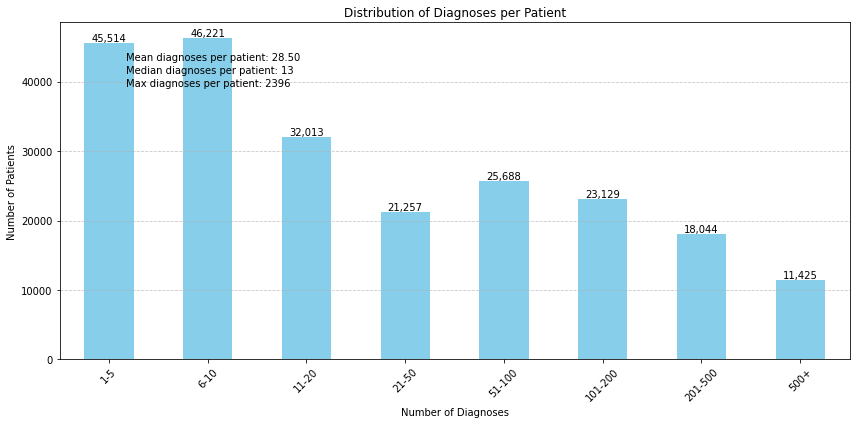

Number of patients by diagnosis count:
1-5        45514
6-10       46221
11-20      32013
21-50      21257
51-100     25688
101-200    23129
201-500    18044
500+       11425
Name: count, dtype: int64


In [7]:
# Compute number of diagnoses per patient
diagnoses_per_patient = diagnoses_df.groupby('subject_id').size()

# Create bins for the number of diagnoses
bins = [0, 5, 10, 15, 20, 30, 50, 100, diagnoses_per_patient.max()]
labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '101-200', '201-500', '500+']

# Categorize patients by number of diagnoses
diagnoses_buckets = pd.cut(diagnoses_per_patient, bins=bins, labels=labels, right=True)
bucket_counts = diagnoses_buckets.value_counts().sort_index()

# Create visualization
plt.figure(figsize=(12, 6))
ax = bucket_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Diagnoses per Patient')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, v in enumerate(bucket_counts):
    ax.text(i, v + 0.5, f"{v:,}", ha='center', va='bottom')

# Add summary statistics
plt.figtext(0.15, 0.85, f"Mean diagnoses per patient: {diagnoses_per_patient.mean():.2f}")
plt.figtext(0.15, 0.82, f"Median diagnoses per patient: {diagnoses_per_patient.median():.0f}")
plt.figtext(0.15, 0.79, f"Max diagnoses per patient: {diagnoses_per_patient.max():.0f}")

plt.tight_layout()
plt.show()

# Show detailed numeric breakdown
print("Number of patients by diagnosis count:")
print(bucket_counts)